 # <h2 id="1. Data Preparation">1. Data Preparation</h2>

In [ ]:
# import library

# data transformation
import numpy as np
from scipy.stats import yeojohnson
import pandas as pd

 ## <h3 id="1.1 Load data">1.1 Load data</h3>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from pandas import read_csv

import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import warnings
warnings.simplefilter(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import cufflinks as cf
cf.go_offline()
import plotly.io as pio
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# data transformation
import numpy as np
from scipy.stats import yeojohnson
import pandas as pd

# evalution
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load file csv in drive
path = r"/content/drive/Shareddrives/Time series and forecast/lan/Data/Taichinh.csv"
df =  read_csv(path , header=0, parse_dates=True, squeeze=True)

# delete redundant columns in data
df.drop(df.columns[[0]], axis=1, inplace=True)
df.pop("vietnameseName")
df.pop("snapshot_date")


# check the first 5 lines of the data set
df.head()

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,NVT,2021-12-01,15:12:03,HOSE,STOCK,11.00,11.75,10.25,11.70,11.70,...,11.5,11.7,11.65,22900.0,2.668300e+08,0.0,0.000000e+00,0.70,0.70,6.3636
1,DXG,2021-12-03,15:12:06,HOSE,STOCK,32.20,34.45,29.95,32.50,33.65,...,31.1,31.1,32.41,15145900.0,4.909184e+11,100000.0,3.000000e+09,-1.10,-1.10,-3.4161
2,FUESSV50,2021-12-03,15:12:06,HOSE,ETF,23.40,25.03,21.77,23.48,25.03,...,23.1,23.1,24.47,31800.0,7.781320e+08,0.0,0.000000e+00,-0.30,-0.30,-1.2821
3,FUCVREIT,2021-12-03,15:12:06,HOSE,IFC,11.85,12.65,11.05,11.65,11.90,...,11.6,11.6,11.79,20200.0,2.382450e+08,0.0,0.000000e+00,-0.25,-0.25,-2.1097
4,LEC,2021-12-03,15:12:06,HOSE,STOCK,14.70,15.70,13.70,14.70,15.50,...,14.7,14.7,15.06,1100.0,1.657000e+07,0.0,0.000000e+00,0.00,0.00,0.0000


In [ ]:
# filter data by VCB
code_need = ['VCB']
df_filter = df[df.code.isin(code_need)]
df_filter

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
12,VCB,2021-12-01,15:12:03,HOSE,STOCK,98.90,105.8,92.0,99.40,101.50,...,76.104,76.646,77.079,551500.0,5.490935e+10,83000.0,8.538700e+09,0.10,0.0774,0.1011
45,VCB,2021-12-03,15:12:06,HOSE,STOCK,99.10,106.0,92.2,99.20,100.80,...,75.485,75.872,76.398,795900.0,7.853697e+10,0.0,0.000000e+00,-1.10,-0.8516,-1.1100
644,VCB,2021-11-10,15:11:02,HOSE,STOCK,97.10,103.8,90.4,97.10,98.20,...,74.943,75.562,75.268,857100.0,8.332470e+10,20000.0,2.020000e+09,0.50,0.3871,0.5149
1126,VCB,2021-11-18,15:11:03,HOSE,STOCK,98.00,104.8,91.2,98.30,98.30,...,75.097,75.097,75.593,709700.0,6.929314e+10,109000.0,1.076360e+10,-1.00,-0.7742,-1.0204
1149,VCB,2021-11-26,15:11:03,HOSE,STOCK,107.10,114.5,99.7,106.70,108.20,...,80.517,81.291,82.561,879600.0,9.380376e+10,83000.0,8.663400e+09,-2.10,-1.6258,-1.9608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139028,VCB,2017-11-17,15:11:02,HOSE,STOCK,44.70,47.8,41.6,44.80,45.15,...,33.329,33.366,33.606,2063770.0,9.228994e+10,350000.0,1.565165e+10,-0.30,-0.2254,-0.6711
139045,VCB,2017-10-31,15:10:01,HOSE,STOCK,41.90,44.8,39.0,41.90,42.10,...,31.111,31.111,31.367,1322440.0,5.519708e+10,869470.0,3.629081e+10,-0.50,-0.3757,-1.1933
139141,VCB,2017-12-13,15:12:01,HOSE,STOCK,44.70,47.8,41.6,45.00,45.10,...,32.840,33.065,33.464,1177420.0,5.243204e+10,0.0,0.000000e+00,-0.70,-0.5260,-1.5660
139182,VCB,2017-10-26,15:10:01,HOSE,STOCK,40.75,43.6,37.9,40.75,41.25,...,30.210,30.510,30.586,1922030.0,7.822823e+10,0.0,0.000000e+00,-0.15,-0.1127,-0.3681


In [ ]:
# remove unnecessary columns from the dataset
columns = ['code', 'time', 'type', 'floor']
df_filter.drop(columns, inplace=True, axis=1)

In [ ]:
# set index
df_filter = df_filter.set_index("date")
df_filter

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
date,,,,,,,,,,,,,,,,,,,,
2021-12-01,98.90,105.8,92.0,99.40,101.50,98.30,99.0,99.56,76.955,78.581,76.104,76.646,77.079,551500.0,5.490935e+10,83000.0,8.538700e+09,0.10,0.0774,0.1011
2021-12-03,99.10,106.0,92.2,99.20,100.80,97.50,98.0,98.68,76.801,78.039,75.485,75.872,76.398,795900.0,7.853697e+10,0.0,0.000000e+00,-1.10,-0.8516,-1.1100
2021-11-10,97.10,103.8,90.4,97.10,98.20,96.80,97.6,97.22,75.175,76.026,74.943,75.562,75.268,857100.0,8.332470e+10,20000.0,2.020000e+09,0.50,0.3871,0.5149
2021-11-18,98.00,104.8,91.2,98.30,98.30,97.00,97.0,97.64,76.104,76.104,75.097,75.097,75.593,709700.0,6.929314e+10,109000.0,1.076360e+10,-1.00,-0.7742,-1.0204
2021-11-26,107.10,114.5,99.7,106.70,108.20,104.00,105.0,106.64,82.607,83.768,80.517,81.291,82.561,879600.0,9.380376e+10,83000.0,8.663400e+09,-2.10,-1.6258,-1.9608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-17,44.70,47.8,41.6,44.80,45.15,44.35,44.4,44.72,33.666,33.930,33.329,33.366,33.606,2063770.0,9.228994e+10,350000.0,1.565165e+10,-0.30,-0.2254,-0.6711
2017-10-31,41.90,44.8,39.0,41.90,42.10,41.40,41.4,41.74,31.487,31.638,31.111,31.111,31.367,1322440.0,5.519708e+10,869470.0,3.629081e+10,-0.50,-0.3757,-1.1933
2017-12-13,44.70,47.8,41.6,45.00,45.10,43.70,44.0,44.53,33.817,33.891,32.840,33.065,33.464,1177420.0,5.243204e+10,0.0,0.000000e+00,-0.70,-0.5260,-1.5660


In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 2021-12-01 to 2017-11-14
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   basicPrice    1247 non-null   float64
 1   ceilingPrice  1247 non-null   float64
 2   floorPrice    1247 non-null   float64
 3   open          1247 non-null   float64
 4   high          1247 non-null   float64
 5   low           1247 non-null   float64
 6   close         1247 non-null   float64
 7   average       1247 non-null   float64
 8   adOpen        1247 non-null   float64
 9   adHigh        1247 non-null   float64
 10  adLow         1247 non-null   float64
 11  adClose       1247 non-null   float64
 12  adAverage     1247 non-null   float64
 13  nmVolume      1247 non-null   float64
 14  nmValue       1247 non-null   float64
 15  ptVolume      1247 non-null   float64
 16  ptValue       1247 non-null   float64
 17  change        1247 non-null   float64
 18  adChange      1247

In [ ]:
df_filter.describe()

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03,1.247000e+03,1.247000e+03,1.247000e+03,1247.000000,1247.000000,1247.000000
mean,70.996552,75.921211,66.070970,71.209503,72.074459,70.384763,71.274419,71.231354,54.441283,55.102215,53.810338,54.490865,54.457557,1.421326e+06,9.836035e+10,1.175252e+05,8.858478e+09,0.051002,0.039117,0.097285
std,21.983696,23.515363,20.452937,21.532927,21.749040,21.246879,21.536646,21.488355,17.190094,17.363106,16.963067,17.192748,17.155745,9.210919e+05,6.785288e+10,3.108720e+05,2.280359e+10,1.354486,1.037269,1.837425
min,0.000000,0.000000,0.000000,34.800000,35.200000,34.700000,34.850000,34.940000,25.597000,25.891000,25.524000,25.633000,25.700000,1.414500e+05,8.280934e+09,0.000000e+00,0.000000e+00,-6.800000,-5.264600,-6.991900
25%,55.350000,59.150000,51.550000,55.400000,56.050000,54.800000,55.400000,55.525000,42.049000,42.578500,41.519500,42.049000,42.154500,7.670050e+05,5.057585e+10,0.000000e+00,0.000000e+00,-0.500000,-0.387100,-0.835800
50%,71.200000,76.100000,66.300000,71.000000,72.000000,70.000000,71.200000,71.000000,54.107000,54.803000,53.055000,54.107000,54.117000,1.191800e+06,8.153194e+10,2.500000e+04,2.013984e+09,0.000000,0.000000,0.000000
75%,89.350000,95.550000,83.150000,89.150000,89.800000,88.650000,89.400000,89.190000,68.540000,69.151000,68.193000,68.654000,68.555500,1.832810e+06,1.261148e+11,1.038550e+05,8.298050e+09,0.675000,0.496500,0.945950
max,116.400000,124.500000,108.300000,116.700000,117.200000,115.000000,116.400000,116.120000,90.349000,90.736000,89.033000,90.117000,89.900000,6.724710e+06,6.384662e+11,7.569208e+06,4.554225e+11,5.700000,4.412900,6.951000


 ## <h3 id="1.2 Feature engineering">1.2 Feature engineering</h3>

 ### <h4 id="1.2.1 Data Transformation">1.2.1 Data Transformation</h4>

In [ ]:
# Box cox 
def yeo_johnson_transform(data):
    """
    Áp dụng phương pháp Yeo-Johnson cho toàn bộ dataset

    Tham số:
        - data: pandas DataFrame hoặc numpy array, bộ dữ liệu cần biến đổi

    Kết quả:
        - transformed_data: pandas DataFrame hoặc numpy array, bộ dữ liệu đã được biến đổi
    """
    transformed_data = data.copy()

    # Duyệt qua từng cột trong dataset
    for col in transformed_data.columns:
        # Kiểm tra nếu cột có giá trị âm
        if np.min(transformed_data[col]) < 0:
            # Áp dụng phương pháp Yeo-Johnson cho cột đó
            transformed_col, _ = yeojohnson(transformed_data[col] + 1) # Thêm 1 để tránh giá trị âm
            transformed_data[col] = transformed_col

    return transformed_data

# Sử dụng hàm yeo_johnson_transform để biến đổi toàn bộ dataset
# df là pandas DataFrame chứa dữ liệu của dataset
df_box_cox = yeo_johnson_transform(df_filter)

In [ ]:
df_box_cox.describe()

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03,1.247000e+03,1.247000e+03,1.247000e+03,1247.000000,1247.000000,1247.000000
mean,70.996552,75.921211,66.070970,71.209503,72.074459,70.384763,71.274419,71.231354,54.441283,55.102215,53.810338,54.490865,54.457557,1.421326e+06,9.836035e+10,1.175252e+05,8.858478e+09,1.146584,1.133615,1.165292
std,21.983696,23.515363,20.452937,21.532927,21.749040,21.246879,21.536646,21.488355,17.190094,17.363106,16.963067,17.192748,17.155745,9.210919e+05,6.785288e+10,3.108720e+05,2.280359e+10,1.433157,1.117988,1.889741
min,0.000000,0.000000,0.000000,34.800000,35.200000,34.700000,34.850000,34.940000,25.597000,25.891000,25.524000,25.633000,25.700000,1.414500e+05,8.280934e+09,0.000000e+00,0.000000e+00,-5.090231,-3.720908,-5.594339
25%,55.350000,59.150000,51.550000,55.400000,56.050000,54.800000,55.400000,55.525000,42.049000,42.578500,41.519500,42.049000,42.154500,7.670050e+05,5.057585e+10,0.000000e+00,0.000000e+00,0.511619,0.634153,0.164898
50%,71.200000,76.100000,66.300000,71.000000,72.000000,70.000000,71.200000,71.000000,54.107000,54.803000,53.055000,54.107000,54.117000,1.191800e+06,8.153194e+10,2.500000e+04,2.013984e+09,1.041949,1.052465,1.021294
75%,89.350000,95.550000,83.150000,89.150000,89.800000,88.650000,89.400000,89.190000,68.540000,69.151000,68.193000,68.654000,68.555500,1.832810e+06,1.261148e+11,1.038550e+05,8.298050e+09,1.780169,1.604662,2.014685
max,116.400000,124.500000,108.300000,116.700000,117.200000,115.000000,116.400000,116.120000,90.349000,90.736000,89.033000,90.117000,89.900000,6.724710e+06,6.384662e+11,7.569208e+06,4.554225e+11,7.737605,6.352709,8.615726


In [ ]:
# Min-Max Scaling
def min_max_scaling(data):
    """
    Áp dụng phương pháp Min-Max Scaling cho toàn bộ dataset

    Tham số:
        - data: pandas DataFrame hoặc numpy array, bộ dữ liệu cần chuẩn hóa

    Kết quả:
        - scaled_data: pandas DataFrame hoặc numpy array, bộ dữ liệu đã được chuẩn hóa
    """
    scaled_data = data.copy()

    # Duyệt qua từng cột trong dataset
    for col in scaled_data.columns:
        # Tính giá trị min, max của cột đó
        min_val = np.min(scaled_data[col])
        max_val = np.max(scaled_data[col])

        # Áp dụng công thức Min-Max Scaling cho cột đó
        scaled_data[col] = (scaled_data[col] - min_val) / (max_val - min_val)

    return scaled_data

# Sử dụng hàm min_max_scaling để chuẩn hóa toàn bộ dataset
# df là pandas DataFrame chứa dữ liệu của dataset
df_scaled = min_max_scaling(df_box_cox)

In [ ]:
df_scaled.describe()

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,0.609936,0.609809,0.610074,0.444560,0.449689,0.444393,0.446651,0.447048,0.445458,0.450478,0.445391,0.447520,0.447937,0.194414,0.142941,0.015527,0.019451,0.486194,0.481905,0.475693
std,0.188863,0.188878,0.188854,0.262917,0.265232,0.264594,0.264091,0.264700,0.265476,0.267763,0.267097,0.266620,0.267223,0.139914,0.107671,0.041071,0.050071,0.111722,0.110982,0.132986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475515,0.475100,0.475993,0.251526,0.254268,0.250311,0.251993,0.253572,0.254077,0.257344,0.251862,0.254575,0.256301,0.095022,0.067115,0.000000,0.000000,0.436695,0.432323,0.405293
50%,0.611684,0.611245,0.612188,0.442002,0.448780,0.439601,0.445739,0.444198,0.440295,0.445863,0.433498,0.441567,0.442632,0.159549,0.116237,0.003303,0.004422,0.478037,0.473849,0.465560
75%,0.767612,0.767470,0.767775,0.663614,0.665854,0.671856,0.668915,0.668268,0.663192,0.667129,0.671858,0.667158,0.667531,0.256918,0.186983,0.013721,0.018221,0.535585,0.528665,0.535467
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ### <h4 id="1.2.2 Feature Selection">1.2.2 Feature Selection</h4>

#### 1.2.2.1 L1 regularization (Lasso)

In [ ]:
# pick dataset 

# df_L1 = df_scaled.copy()


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_diabetes

In [ ]:
# X = df_L1.drop('close', axis=1)
# y = df_L1['close']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('model', Lasso())
# ])

In [ ]:
# search = GridSearchCV(pipeline, {'model__alpha': np.arange(0.1, 3, 0.1)}, cv=5,
#                       scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# search.fit(X_train, y_train)

In [ ]:
# print("Best params: ", search.best_params_)

In [ ]:
# coef = search.best_estimator_['model'].coef_

In [ ]:
# selected_features = X.columns[coef != 0]
# unselected_features = X.columns[coef == 0]
# print("Biến được chọn: ", selected_features)
# print("Biến loại bỏ: ", unselected_features)

In [ ]:
# Tập data mới sau khi chọn biến bằng L1

# df_L1_new = df_L1[selected_features]
# close = df_scaled['close']
# df_L1_new['close'] = close
# df_L1_new 

In [ ]:
code_in_L1 = ['high', 'low', 'average', 'close']
df_L1 = df_scaled[code_in_L1]
df_L1

,high,low,average,close
date,,,,
2021-12-01,0.808537,0.792030,0.796009,0.786634
2021-12-03,0.800000,0.782067,0.785169,0.774372
2021-11-10,0.768293,0.773350,0.767184,0.769467
2021-11-18,0.769512,0.775841,0.772358,0.762109
2021-11-26,0.890244,0.863014,0.883222,0.860208
...,...,...,...,...
2017-11-17,0.121341,0.120174,0.120473,0.117106
2017-10-31,0.084146,0.083437,0.083764,0.080319
2017-12-13,0.120732,0.112080,0.118133,0.112201


#### 1.2.2.2 Backward Feature Selection

In [ ]:
# pick dataset 

# df_BFS = df_scaled.copy()
# df_BFS

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Xóa cột target (cột cần dự đoán) khỏi dataframe df_BFS

# X = df_BFS.drop('close', axis=1)
# y = df_BFS['close'] # Lưu cột target vào biến y

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình GRU

# model = Sequential()
# model.add(GRU(64, input_shape=(X_train.shape[1], 1))) # Đầu vào là số lượng đặc trưng, độ dài của chuỗi dữ liệu (1D)
# model.add(Dense(1)) # Đầu ra là 1 giá trị dự đoán

# Compile mô hình
# model.compile(optimizer='adam', loss='mse')

# Khởi tạo danh sách các đặc trưng ban đầu
# selected_features = list(X.columns)

# # Chuyển đổi dữ liệu về dạng chuỗi 3D để đưa vào mô hình GRU
# X_train_3d = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
# X_test_3d = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Hàm tính RMSE (Root Mean Squared Error) để đánh giá độ tốt của mô hình
# def rmse(y_true, y_pred):
#     return mean_squared_error(y_true, y_pred, squared=False)

In [ ]:
# Loop thực hiện Backward feature selection

# while len(selected_features) > 0:
#     # Huấn luyện mô hình trên tập huấn luyện
#     model.fit(X_train_3d, y_train, epochs=10, batch_size=32, verbose=0)
#     # Dự đoán trên tập kiểm tra
#     y_pred = model.predict(X_test_3d)

#     # Tính RMSE trên tập kiểm tra
#     current_rmse = rmse(y_test, y_pred)

#     # In ra kết quả RMSE của mô hình hiện tại
#     print("Current RMSE: ", current_rmse)
#     print("Selected Features: ", selected_features)

#     # Lưu lại số lượng đặc trưng ban đầu
#     num_features = len(selected_features)

#     # Xóa đi một đặc trưng và đánh giá độ tốt của mô hình với tập huấn luyện và tập kiểm tra sau khi xóa đặc trưng đó
#     best_rmse = current_rmse
#     best_feature = None

#     # Loop qua từng đặc trưng trong danh sách các đặc trưng đã chọn
#     for feature in selected_features:
#         # Tạo một danh sách các đặc trưng mới bằng cách loại bỏ đặc trưng hiện tại
#         new_features = selected_features.copy()
#         new_features.remove(feature)

#         # Chọn lại dữ liệu huấn luyện và kiểm tra chỉ với các đặc trưng mới
#         X_train_new = X_train[new_features]
#         X_test_new = X_test[new_features]

#         # Chuyển đổi dữ liệu về dạng chuỗi 3D
#         X_train_new_3d = np.reshape(X_train_new.values, (X_train_new.shape[0], X_train_new.shape[1], 1))
#         X_test_new_3d = np.reshape(X_test_new.values, (X_test_new.shape[0], X_test_new.shape[1], 1))

#         # Huấn luyện mô hình trên tập huấn luyện mới
#         model.fit(X_train_new_3d, y_train, epochs=10, batch_size=32, verbose=0)

#         # Dự đoán trên tập kiểm tra mới
#         y_pred_new = model.predict(X_test_new_3d)

#         # Tính RMSE trên tập kiểm tra mới
#         current_rmse_new = rmse(y_test, y_pred_new)

#         # So sánh RMSE của mô hình mới với RMSE của mô hình hiện tại
#         if current_rmse_new < best_rmse:
#             best_rmse = current_rmse_new
#             best_feature = feature

#     # Nếu RMSE của mô hình mới tốt hơn, thì xóa đặc trưng đang xét
#     if best_feature is not None:
#         selected_features.remove(best_feature)
#         print("Removed Feature: ", best_feature)
#     else:
#         print("No more features to remove")
#         break

In [ ]:
# # In ra danh sách các đặc trưng cuối cùng đã chọn
# print("Selected Features after BFS: ", selected_features)

# # In ra các đặc trưng bị loại bỏ
# removed_features = list(set(X.columns) - set(selected_features))
# print("Removed Features: ", removed_features)

In [ ]:
# Tạo DataFrame mới df_BFS_new chỉ với các đặc trưng được chọn
# df_BFS_new = df_BFS[selected_features]
# close = df_scaled['close']
# df_BFS_new['close'] = close
# df_BFS_new

In [ ]:
code_in_BFS = ['basicPrice', 'high', 'pctChange', 'close']
df_BFS = df_scaled[code_in_BFS]
df_BFS

,basicPrice,high,pctChange,close
date,,,,
2021-12-01,0.849656,0.808537,0.472958,0.786634
2021-12-03,0.851375,0.800000,0.385970,0.774372
2021-11-10,0.834192,0.768293,0.503431,0.769467
2021-11-18,0.841924,0.769512,0.392254,0.762109
2021-11-26,0.920103,0.890244,0.327433,0.860208
...,...,...,...,...
2017-11-17,0.384021,0.121341,0.417023,0.117106
2017-10-31,0.359966,0.084146,0.380153,0.080319
2017-12-13,0.384021,0.120732,0.354375,0.112201


 ## <h3 id="1.3 Divide the data into training and test sets">1.3 Divide the data into training and test sets</h3>

ACF

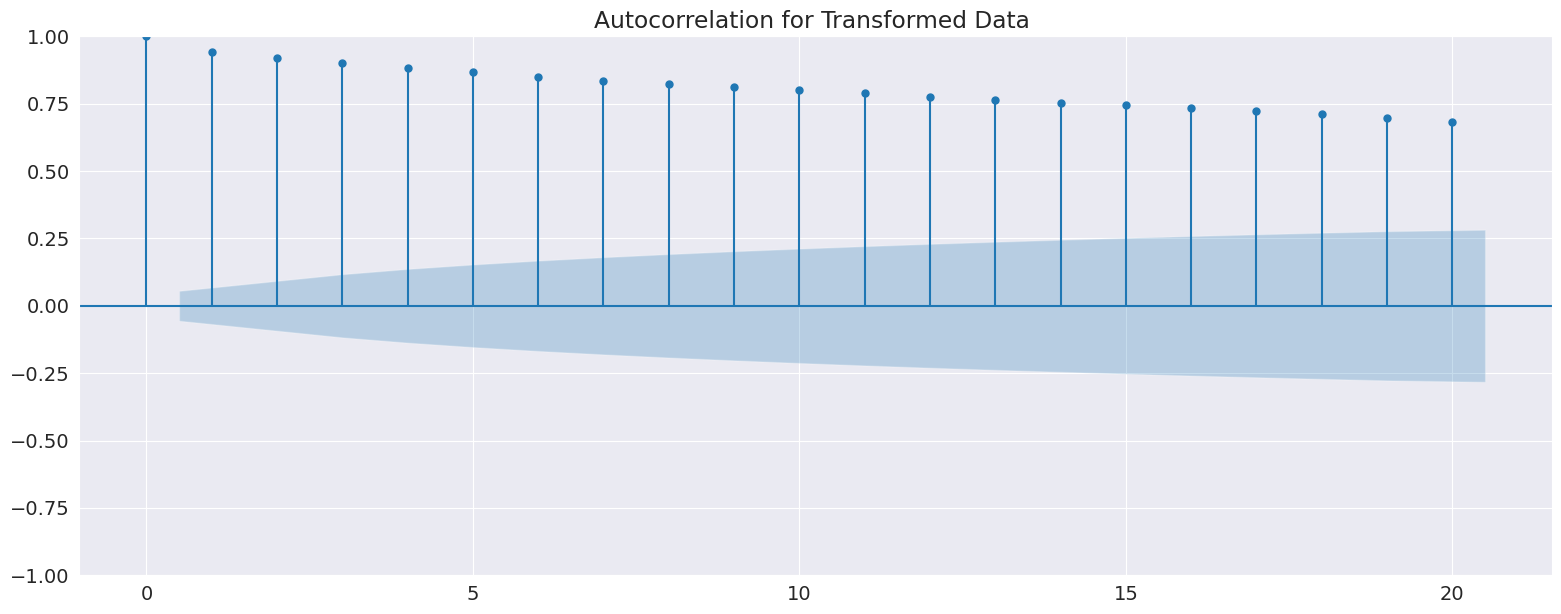

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(19, 7))
plot_acf(df_scaled['close'], lags = 20, ax = ax, title = "Autocorrelation for Transformed Data ")
plt.show()

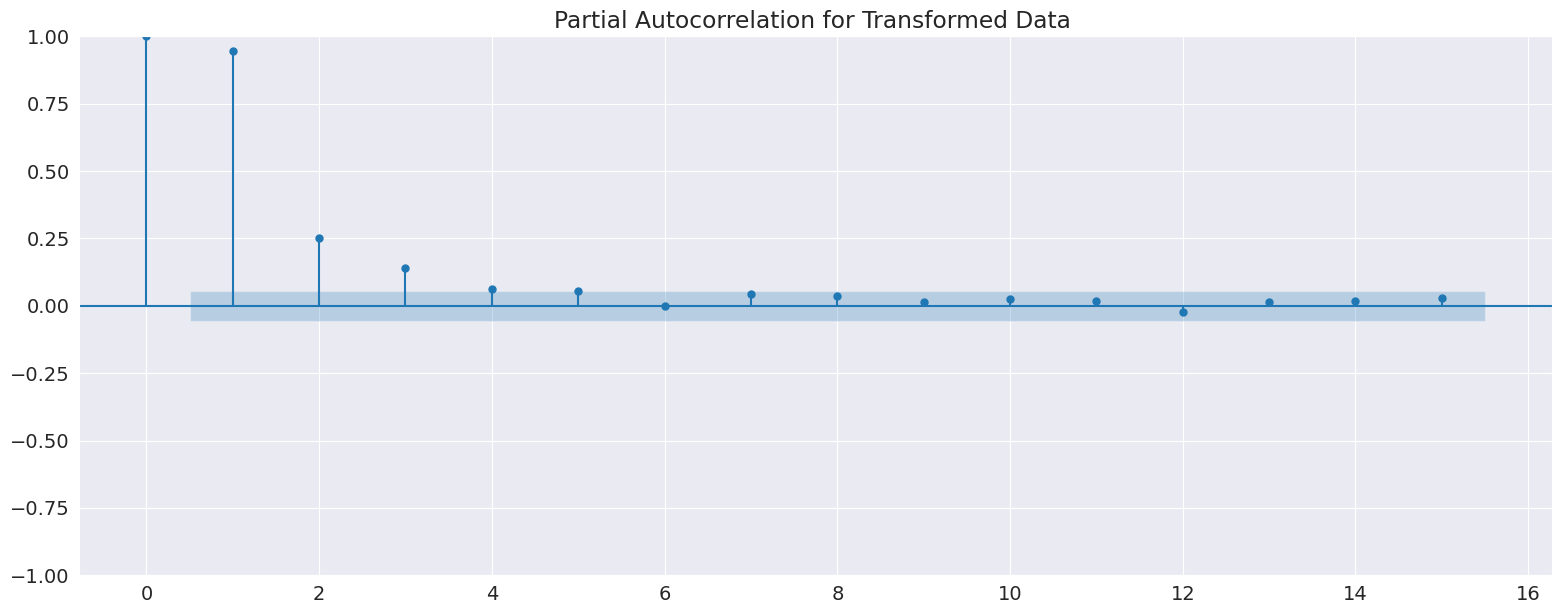

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(19, 7))
plot_pacf(df_scaled['close'], lags = 15, ax = ax, title = "Partial Autocorrelation for Transformed Data ")
plt.show()

BFS

In [ ]:
X_B = df_BFS.iloc[:, :-1].values
y_B = df_BFS.iloc[:, -1].values

In [ ]:
# Split data into training and testing sets
X_train_B, y_train_B = X_B[:-14], y_B[:-14]
X_test_B, y_test_B = X_B[-14:], y_B[-14:]

L1 regularization

In [ ]:
X_L = df_L1.iloc[:, :-1].values
y_L = df_L1.iloc[:, -1].values

In [ ]:
# Split data into training and testing sets
X_train_L, y_train_L = X_L[:-14], y_L[:-14]
X_test_L, y_test_L = X_L[-14:], y_L[-14:]

 # <h2 id="2. Building Model">2. Building Model</h2>


 ## <h3 id="2.1 GRU">2.1 GRU </h3>

 ### <h4 id="2.1.1 GRU-BFS-data">2.1.1 GRU-BFS-data </h4>

In [ ]:
# Xây dựng mô hình GRU
def GRU(X_train, X_test, y_train, y_test):

  # Reshape input data
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

  # Define the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.GRU(units=50, return_sequences=True))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.GRU(units=50))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Fit the model to the training data
  model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
  # Predict on the test data
  y_pred = model.predict(X_test)

  # plt.show()
  return y_pred, y_test

In [ ]:
y_pred_2, y_test2 = GRU(X_train_B, X_test_B, y_train_B, y_test_B)

Epoch 1/100
39/39 [==============================] - 10s 41ms/step - loss: 0.0647 - val_loss: 0.0459
Epoch 2/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0121 - val_loss: 0.0017
Epoch 3/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0060 - val_loss: 7.5147e-04
Epoch 4/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0048 - val_loss: 1.9321e-04
Epoch 5/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 1.4857e-04
Epoch 6/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 1.2781e-04
Epoch 7/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 1.2230e-04
Epoch 8/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 6.3647e-04
Epoch 9/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0034 - val_loss: 4.1824e-04
Epoch 10/100
39/39 [==============================] - 0s 11ms/step - lo

In [ ]:
forecast_accuracy(y_pred_2, y_test2)

{'mape': 0.040840114958658746,
 'mpe': 0.4229051927644887,
 'rmse': 0.06891159288477923,
 'percentage_rmse': 68.50358345368087}

### <h3 id="2.1.2 GRU-L1-data">2.1.2 GRU-L1-data </h3>

In [ ]:
X_L = df_L1.iloc[:, :-1].values
y_L = df_L1.iloc[:, -1].values

In [ ]:
# Split data into training and testing sets
X_train_L, y_train_L = X_L[:-14], y_L[:-14]
X_test_L, y_test_L = X_L[-14:], y_L[-14:]

In [ ]:
y_pred_3, y_test3 = GRU(X_train_L, X_test_L, y_train_L, y_test_L)

Epoch 1/100
39/39 [==============================] - 13s 46ms/step - loss: 0.0568 - val_loss: 0.0164
Epoch 2/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 7.9062e-06
Epoch 3/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 1.9640e-05
Epoch 4/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0036 - val_loss: 8.1092e-06
Epoch 5/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0032 - val_loss: 5.8652e-05
Epoch 6/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 4.6541e-05
Epoch 7/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0032 - val_loss: 5.7553e-04
Epoch 8/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0029 - val_loss: 8.8020e-06
Epoch 9/100
39/39 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 1.8500e-05
Epoch 10/100
39/39 [==============================] - 0s 11ms/step 

In [ ]:
forecast_accuracy(y_pred_3, y_test3)

{'mape': 0.10568292654359834,
 'mpe': 0.3176849267045945,
 'rmse': 0.07180184111767243,
 'percentage_rmse': 71.37671920247858}

 ## <h3 id="2.2 LSTM">2.2 LSTM </h3>

In [ ]:
def lstm(X_train, X_test, y_train, y_test):
  # Reshape input data
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

  ##  Mô hình gồm 4 lớp,1 lớp gồm 20 nút 
  tf.keras.backend.clear_session()
  model_LSTM=Sequential()
  ## Lớp đầu vào
  model_LSTM.add(LSTM(32,return_sequences=True,input_shape=(X_train.shape[1], 1)))
  ## Lớp ẩn
  model_LSTM.add(LSTM(32,return_sequences=True))
  model_LSTM.add(LSTM(32))
  ## Lớp đầu ra
  model_LSTM.add(Dense(1))

  ## hàm mất mát là: MSE, hệ sô optimizer là adam
  model_LSTM.compile(loss='mean_squared_error',optimizer='adam')

  ## Tiến hành chạy mô hình
  model_LSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

  # Dự đoán trên tập kiểm tra
  y_pred = model_LSTM.predict(X_test)
  return y_pred, y_test

 ### <h4 id="2.2.1 LSTM-BFS-data">2.2.1 LSTM-BFS-data </h4>

In [ ]:
y_pred_4, y_test4 = lstm(X_train_B, X_test_B, y_train_B, y_test_B)

Epoch 1/10
247/247 [==============================] - 10s 17ms/step - loss: 0.0309 - val_loss: 0.0011
Epoch 2/10
247/247 [==============================] - 3s 12ms/step - loss: 0.0011 - val_loss: 5.4193e-04
Epoch 3/10
247/247 [==============================] - 2s 9ms/step - loss: 7.4284e-04 - val_loss: 5.5617e-05
Epoch 4/10
247/247 [==============================] - 2s 9ms/step - loss: 7.1956e-04 - val_loss: 5.6684e-04
Epoch 5/10
247/247 [==============================] - 2s 9ms/step - loss: 7.4814e-04 - val_loss: 1.0373e-04
Epoch 6/10
247/247 [==============================] - 2s 9ms/step - loss: 7.3922e-04 - val_loss: 8.8150e-05
Epoch 7/10
247/247 [==============================] - 3s 12ms/step - loss: 7.4312e-04 - val_loss: 4.5890e-05
Epoch 8/10
247/247 [==============================] - 3s 12ms/step - loss: 6.7258e-04 - val_loss: 0.0016
Epoch 9/10
247/247 [==============================] - 2s 10ms/step - loss: 7.2512e-04 - val_loss: 4.6813e-05
Epoch 10/10
1/1 [=====================

In [ ]:
forecast_accuracy(y_pred_4, y_test4)

{'mape': 0.10850913897254064,
 'mpe': 0.6332750731160155,
 'rmse': 0.07077358736230974,
 'percentage_rmse': 70.35455349721295}

 ### <h4 id="2.2.2 LSTM-L1-data">2.2.2 LSTM-L1-data </h4>

In [ ]:
y_pred_1, y_test1 = lstm(X_train_L, X_test_L, y_train_L, y_test_L)

Epoch 1/10
247/247 [==============================] - 11s 19ms/step - loss: 0.0252 - val_loss: 7.1344e-04
Epoch 2/10
247/247 [==============================] - 2s 9ms/step - loss: 2.7096e-04 - val_loss: 6.1221e-05
Epoch 3/10
247/247 [==============================] - 2s 9ms/step - loss: 1.1018e-04 - val_loss: 9.9465e-06
Epoch 4/10
247/247 [==============================] - 2s 9ms/step - loss: 9.5149e-05 - val_loss: 3.7227e-05
Epoch 5/10
247/247 [==============================] - 2s 9ms/step - loss: 1.1209e-04 - val_loss: 1.0279e-05
Epoch 6/10
247/247 [==============================] - 3s 12ms/step - loss: 1.2240e-04 - val_loss: 1.2953e-05
Epoch 7/10
247/247 [==============================] - 3s 11ms/step - loss: 1.2037e-04 - val_loss: 2.1049e-05
Epoch 8/10
247/247 [==============================] - 2s 9ms/step - loss: 1.2600e-04 - val_loss: 4.9208e-05
Epoch 9/10
247/247 [==============================] - 2s 9ms/step - loss: 2.0722e-04 - val_loss: 1.3280e-05
Epoch 10/10
247/247 [=======

1/1 [==============================] - 1s 1s/step


In [ ]:
forecast_accuracy(y_pred_1, y_test1)

{'mape': 0.05214378971429751,
 'mpe': 0.5488315402921327,
 'rmse': 0.07059264068572088,
 'percentage_rmse': 70.17467816359387}

 ## <h3 id="2.3 GRU_LSTM">2.3 GRU_LSTM </h3>

In [ ]:
def GRU_LSTM(X_train, X_test, y_train, y_test):

  # Reshape input data
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

  ## Mô hình gồm 5 lớp 2 lớp GRU , lớp LSTM và 1 lớp đầu ra 
  tf.keras.backend.clear_session()
  model_GRU_LSTM=Sequential()
  ## 2 lớp LTSM và lớp đầu vào
  model_GRU_LSTM.add(GRU(32,return_sequences=True,input_shape=(X_train.shape[1],1)))
  model_GRU_LSTM.add(LSTM(32,return_sequences=True))
  # 2 lớp GRU
  model_GRU_LSTM.add(LSTM(32,return_sequences=True))
  model_GRU_LSTM.add(GRU(32))
  # Lớp đầu ra
  model_GRU_LSTM.add(Dense(1))
  model_GRU_LSTM.compile(loss='mean_squared_error',optimizer='adam')

  ## Tiến hành chạy mô hình
  model_GRU_LSTM.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

  # Dự đoán trên tập kiểm tra
  y_pred = model_GRU_LSTM.predict(X_test)

  return y_pred, y_test

 ### <h4 id="2.3.1 GRU_LSTM-BFS-data">2.3.1 GRU_LSTM-BFS-data </h4>

In [ ]:
y_pred_5, y_test5 = GRU_LSTM(X_train_B, X_test_B, y_train_B, y_test_B)

TypeError: ignored

 # <h2 id="3. Evalution">3. Evalution</h2>

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
  forecast = np.array(forecast)
  actual = np.array(actual)
  mape = mean_absolute_error(actual, forecast)/ np.mean(abs(actual))  # MAPE
  mpe = np.mean((forecast - actual)/actual)   # MPE
  rmse = np.mean((forecast - actual)**2)**.5  # RMSE
  percentage_rmse = (rmse / np.mean(actual)) * 100 # %RMSE   
  return({'mape':mape,  
            'mpe': mpe, 
            'rmse':rmse, 
            'percentage_rmse':percentage_rmse, 
            })

 # <h2 id="4. Visualization">4. Visualization</h2>

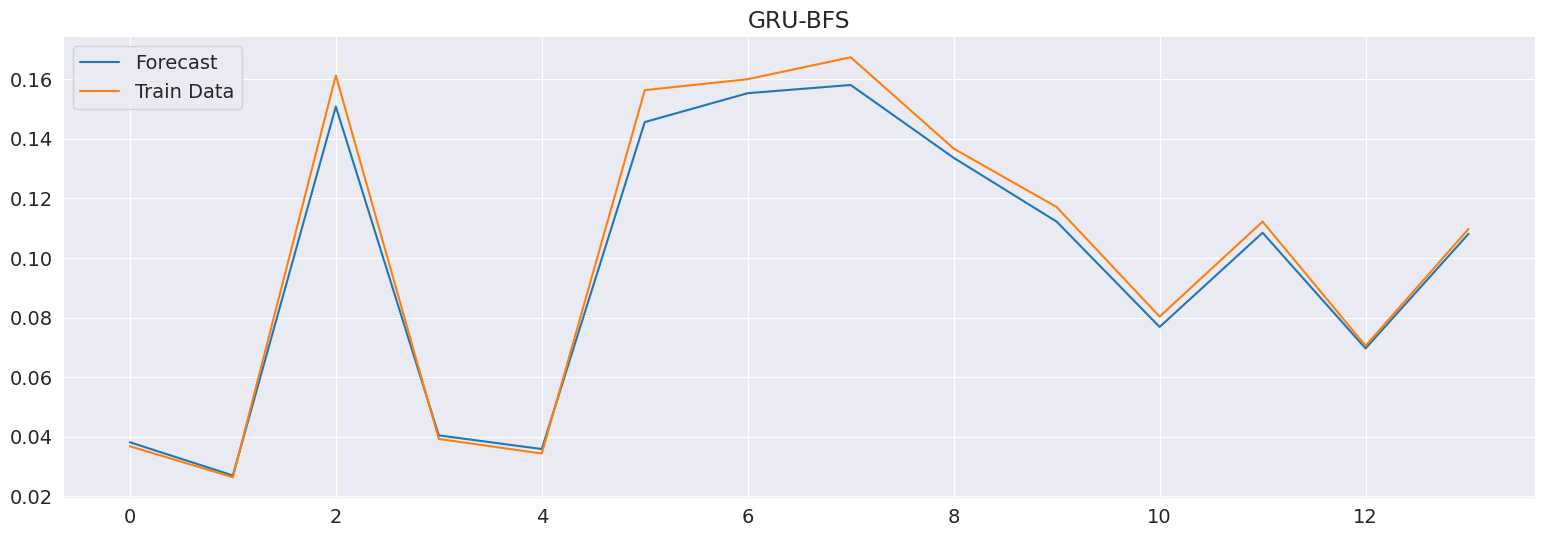

In [ ]:
# đặt tiêu đề cho đồ thị
plt.figure(figsize = (19,6))
plt.title('GRU-BFS_data')

plt.plot(y_pred_2, label='Forecast')
plt.plot(y_test2, label='Train Data')


plt.legend(loc="upper left")
plt.show()

In [ ]:
# y_pred_2, y_test2 = GRU(X_train_B, X_test_B, y_train_B, y_test_B)
forecast_accuracy(y_pred_2, y_test2)

{'mape': 0.040840114958658746,
 'mpe': 0.4229051927644887,
 'rmse': 0.06891159288477923,
 'percentage_rmse': 68.50358345368087}

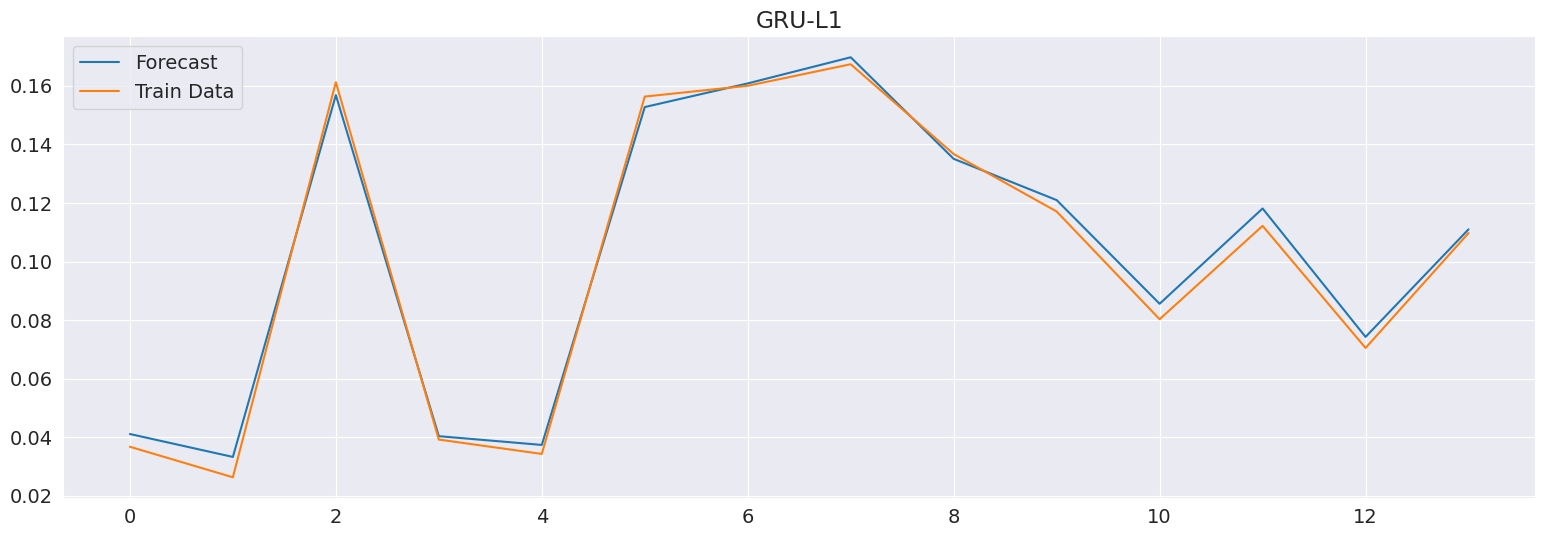

In [ ]:
# đặt tiêu đề cho đồ thị
plt.figure(figsize = (19,6))
plt.title('GRU-L1_data')

plt.plot(y_pred_3, label='Forecast')
plt.plot(y_test3, label='Train Data')


plt.legend(loc="upper left")
plt.show()

In [ ]:
# y_pred_3, y_test3 = GRU(X_train_L, X_test_L, y_train_L, y_test_L)
forecast_accuracy(y_pred_3, y_test3)

{'mape': 0.03444274706124611,
 'mpe': 0.5039762222029577,
 'rmse': 0.06997165951118269,
 'percentage_rmse': 69.55737367341516}

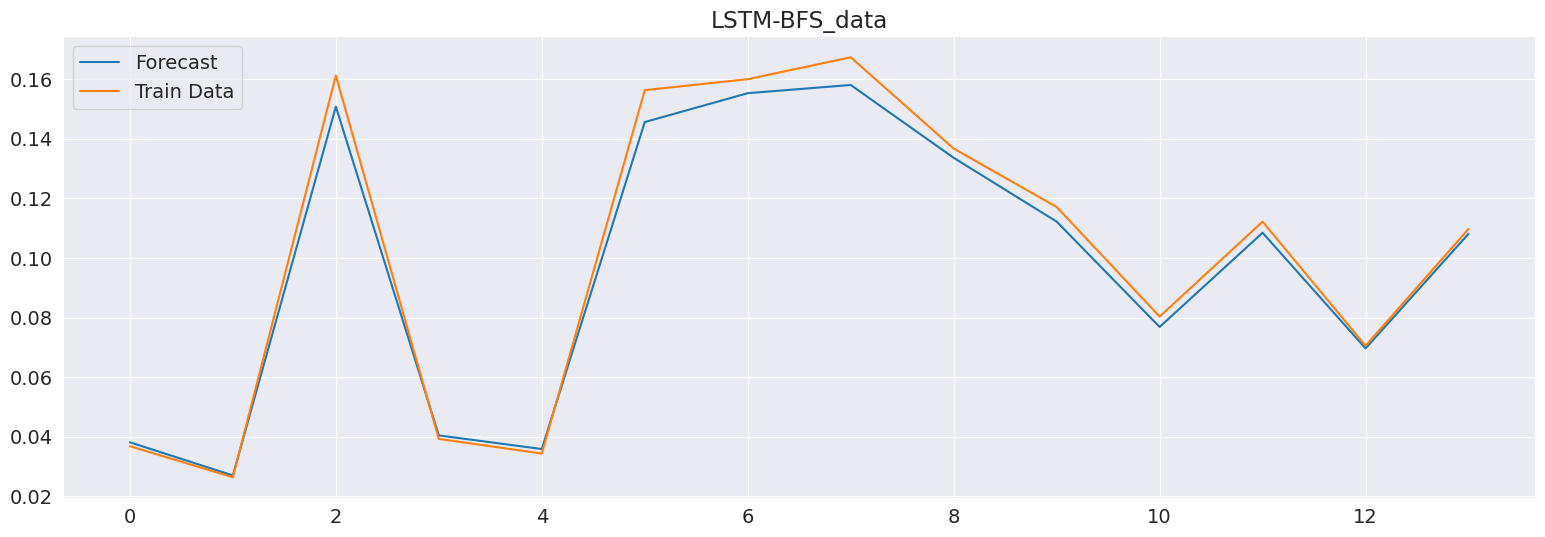

In [ ]:
# đặt tiêu đề cho đồ thị
plt.figure(figsize = (19,6))
plt.title('LSTM-BFS_data')

plt.plot(y_pred_2, label='Forecast')
plt.plot(y_test2, label='Train Data')


plt.legend(loc="upper left")
plt.show()

In [ ]:
forecast_accuracy(y_pred_2, y_test2)

{'mape': 0.040840114958658746,
 'mpe': 0.4229051927644887,
 'rmse': 0.06891159288477923,
 'percentage_rmse': 68.50358345368087}

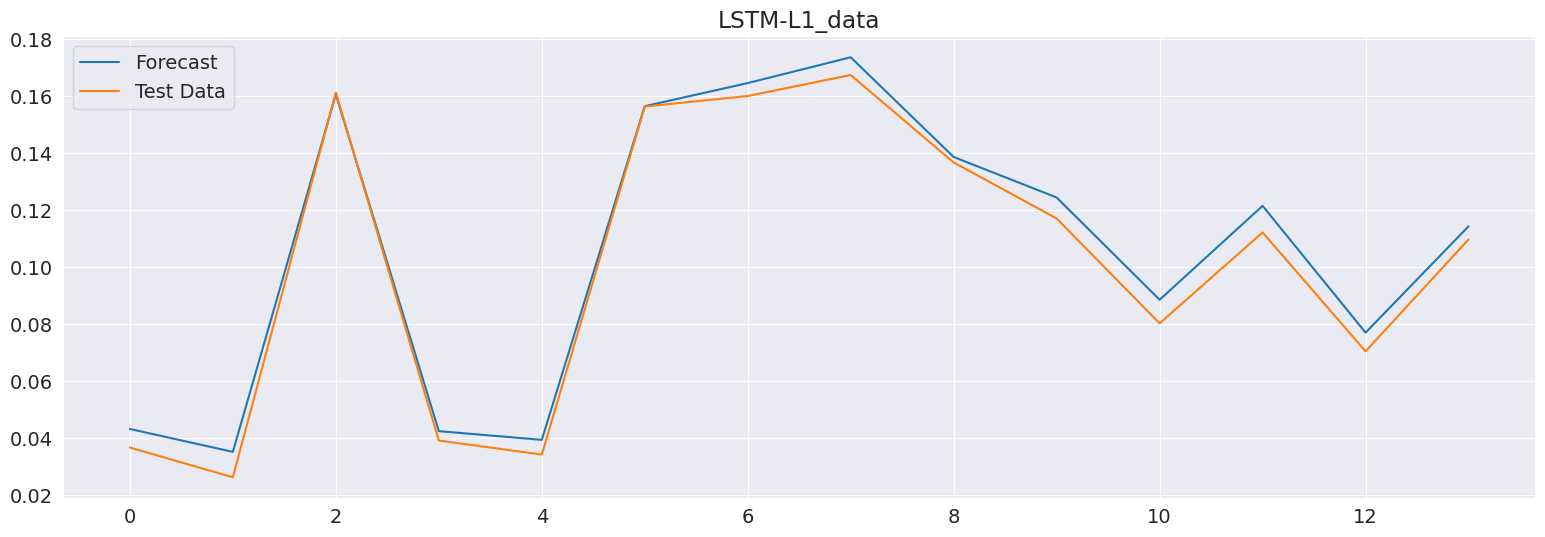

In [ ]:
# đặt tiêu đề cho đồ thị
plt.figure(figsize = (19,6))
plt.title('LSTM-L1_data')

plt.plot(y_pred_1, label='Forecast')
plt.plot(y_test1, label='Test Data')


plt.legend(loc="upper left")
plt.show()

In [ ]:
forecast_accuracy(y_pred_1, y_test1)

{'mape': 0.05214378971429751,
 'mpe': 0.5488315402921327,
 'rmse': 0.07059264068572088,
 'percentage_rmse': 70.17467816359387}